# Parte 2

En esta sección, se trabaja con la simulación de los algoritmos de Phase Commit

Antes de ejecutar todas las celdas, se recomienda ver los resultados, ya que a algunos se les cambiaron los parametros para que la ejecución no demore tanto.

En cada ejecución del algoritmo, se logean las decisiones que toman los nodos.


## Recomendación para los logs
Al habilitar el logeo, hay un warning que salta innecesariamente cada vez que se utiliza la funcion id de NeighborLabel

Para evitar esto se recomienda cambiar la clase NeighborLabel de pydistsim, ya que cada vez que se usa en el algoritmo, logea un warning innecesario. 
La clase se encuentra en `env_directory/lib/python3.11/site-packages/pydistsim/algorithm/node_wrapper.py` y hay que cambiar las lines 68 a 83 por lo siguiente:

```python
class NeighborLabel(_NodeWrapper):
    """
    Class that represents a neighbor of a node. It is used to represent the knowledge that a node has about its
    neighbors.
    """

    def __repr__(self):
        return f"Neighbor(label={self.id})"

    @property
    def id(self):
        #logger.warning(
        #    "Neighbor's id do not correspond to the real id of the node. It can be used to distinguish "
        #    "neighbors from each other."
        #)
        return super().id
```

Si no se quiere hacer esto no hay problema, pero los logs quedan peor.

## Parmetros

Setear la cantidad de nodos (N).
Tambien esta el parametro coordinatorID el cual se recomienda dejar en 0, para que el coordinador sea random. Si se quiere forzar, porque por ejemplo la red es una estrella, simplemente poner el ID del nodo deseado.

In [1]:
# for interactive plots
%matplotlib inline

from pydistsim.logging import set_log_level, enable_logger
from pydistsim import NetworkGenerator, Simulation
from pydistsim.network.behavior import NetworkBehaviorModel
from pydistsim.benchmark import AlgorithmBenchmark

set_log_level("INFO")
enable_logger()

/home/santi/miniconda3/envs/distsim/lib/python3.11/site-packages/pydistsim/network/network.py:560: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


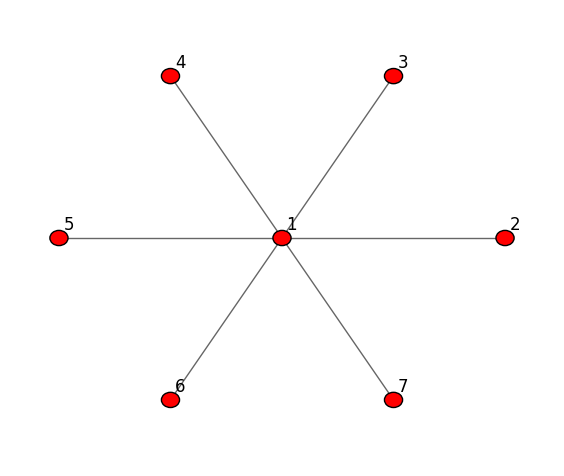

In [2]:
N = 7

net = NetworkGenerator.generate_star_network(n=N)
net.behavioral_properties = NetworkBehaviorModel.UnlikelyRandomLossCommunication
net.show()


## Simulación de 2PC

En estas celdas, se van a ver las ejecuciones de la simulación del algoritmo de 2PC, con su respectivos videos.
Para este caso, se setea un coordinador en particular, el del medio de la star network, ya que es el único que tiene contacto directo con los participantes

In [3]:
def is_coordinator(node):
    neighbor_count = len(list(net.neighbors(node)))
    return neighbor_count == N - 1

In [4]:
from twopc import TwoPCAlgorithm

for node in net.nodes():
    if is_coordinator(node):
        coordinatorID = node._internal_id
        break
    

sim = Simulation(network=net)
twopc_algorithm = (TwoPCAlgorithm, {'coordinatorID': coordinatorID},)
sim.algorithms = (twopc_algorithm, )

2025-12-09 18:20:38.747 | INFO     | pydistsim.simulation:__init__:59 - Simulation 0x798505749110 created successfully.


In [5]:
from IPython.display import HTML
from pydistsim.gui import drawing as draw

anim = draw.create_animation(sim)
video = anim.to_html5_video()

HTML(video)

2025-12-09 18:20:39.674 | INFO     | twopc:receiving:153 - Node 2 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.675 | INFO     | twopc:receiving:153 - Node 3 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.676 | INFO     | twopc:receiving:153 - Node 4 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.676 | INFO     | twopc:receiving:153 - Node 5 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.676 | INFO     | twopc:receiving:153 - Node 6 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.677 | INFO     | twopc:receiving:153 - Node 7 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.675 | INFO     | twopc:receiving:153 - Node 3 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.676 | INFO     | twopc:receiving:153 - Node 4 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:39.676 | INFO     | twopc:receiving:153 - Node 5 received PREPARE from 

In [6]:
sim.reset()
sim.run()
for node in net.nodes():
    print(f"Node {node.memory['unique_value']}: status={node.status}")

2025-12-09 18:20:50.788 | INFO     | twopc:receiving:153 - Node 2 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:50.789 | INFO     | twopc:receiving:153 - Node 3 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:50.789 | INFO     | twopc:receiving:153 - Node 4 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:50.790 | INFO     | twopc:receiving:153 - Node 5 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:50.790 | INFO     | twopc:receiving:153 - Node 6 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:50.790 | INFO     | twopc:receiving:153 - Node 7 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:50.791 | INFO     | twopc:receiving:106 - Coordinator Node 1 received PREPARED from Node 3.
2025-12-09 18:20:50.791 | INFO     | twopc:receiving:106 - Coordinator Node 1 received PREPARED from Node 0.
2025-12-09 18:20:50.792 | INFO     | twopc:receiving:106 - Coordinator Node 1 received PREPARED fr

## Simulación de 3PC

In [7]:
from threepc import ThreePCAlgorithm

sim = Simulation(network=net)
threepc_algorithm = (ThreePCAlgorithm, {'coordinatorID': coordinatorID})
sim.algorithms = (threepc_algorithm, )

2025-12-09 18:20:50.886 | INFO     | pydistsim.simulation:__init__:59 - Simulation 0x7984e022d810 created successfully.


In [8]:
from IPython.display import HTML
from pydistsim.gui import drawing as draw

anim = draw.create_animation(sim)
video = anim.to_html5_video()

HTML(video)

2025-12-09 18:20:51.860 | INFO     | threepc:receiving:207 - Node 2 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.860 | INFO     | threepc:receiving:207 - Node 3 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.861 | INFO     | threepc:receiving:207 - Node 4 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.861 | INFO     | threepc:receiving:207 - Node 5 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.861 | INFO     | threepc:receiving:207 - Node 6 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.862 | INFO     | threepc:receiving:207 - Node 7 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.860 | INFO     | threepc:receiving:207 - Node 3 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.861 | INFO     | threepc:receiving:207 - Node 4 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:20:51.861 | INFO     | threepc:receiving:207 - Node 5 rece

In [9]:

sim.reset()
sim.run()
for node in net.nodes():
    print(f"Node {node.memory['unique_value']}: status={node.status}")

2025-12-09 18:21:01.671 | INFO     | threepc:receiving:207 - Node 3 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:21:01.671 | INFO     | threepc:receiving:207 - Node 4 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:21:01.672 | INFO     | threepc:receiving:207 - Node 5 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:21:01.672 | INFO     | threepc:receiving:207 - Node 6 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:21:01.673 | INFO     | threepc:receiving:207 - Node 7 received PREPARE from Node 1. Sending PREPARED.
2025-12-09 18:21:01.674 | INFO     | threepc:receiving:107 - Coordinator Node 1 received PREPARED from Node 0.
2025-12-09 18:21:01.674 | INFO     | threepc:receiving:107 - Coordinator Node 1 received PREPARED from Node 1.
2025-12-09 18:21:01.675 | INFO     | threepc:receiving:107 - Coordinator Node 1 received PREPARED from Node 2.
2025-12-09 18:21:01.675 | INFO     | threepc:receiving:107 - Coordinator Node 1 receive

# Simulacion de extensión de 3PC

Para tener firmas y soportar fallos bizantinos

/home/santi/miniconda3/envs/distsim/lib/python3.11/site-packages/pydistsim/network/network.py:560: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


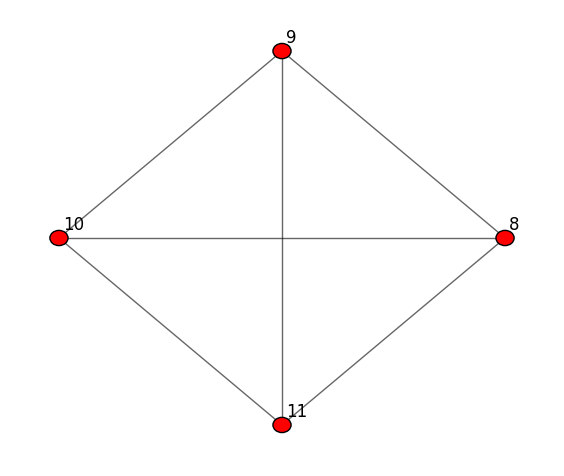

In [10]:
N = 4

net_threepc_byz = NetworkGenerator.generate_complete_network(n=N)
net_threepc_byz.behavioral_properties = NetworkBehaviorModel.UnlikelyRandomLossCommunication
net_threepc_byz.show()

In [11]:
from threepc_byzantine import ThreePCByzantineAlgorithm

sim_threepc_byz = Simulation(network=net_threepc_byz)
threepc_byz_algorithm = (ThreePCByzantineAlgorithm, {'m': 1, 'coordinatorID': 0, 'n': N},)
sim_threepc_byz.algorithms = (threepc_byz_algorithm, )

2025-12-09 18:21:01.971 | INFO     | pydistsim.simulation:__init__:59 - Simulation 0x7984e0245f10 created successfully.


In [12]:
sim_threepc_byz.reset()
sim_threepc_byz.run()

print("\n" + "="*70)
for node in net_threepc_byz.nodes():
    print(f"Node {node.memory['unique_value']}: status={node.status}")

2025-12-09 18:21:01.976 | INFO     | threepc_byzantine:initializer:68 - Node 9 initialized as COORDINATOR (Byzantine tolerant, m=1, quorum=3)
2025-12-09 18:21:01.976 | INFO     | threepc_byzantine:initializer:63 - Node 11 initialized as FAULTY
2025-12-09 18:21:01.977 | INFO     | threepc_byzantine:initializer:71 - Node 8 initialized as REPLICA
2025-12-09 18:21:01.977 | INFO     | threepc_byzantine:initializer:71 - Node 10 initialized as REPLICA
2025-12-09 18:21:01.978 | INFO     | threepc_byzantine:spontaneously:88 - COORDINATOR 9 sends SIGNED PREPARE (sig=bdd2e1b68a24470f) to all replicas
2025-12-09 18:21:01.978 | INFO     | threepc_byzantine:receiving:301 - Replica 8 received VALID signed PREPARE from coordinator 9
2025-12-09 18:21:01.979 | INFO     | threepc_byzantine:receiving:314 - Replica 8 sends SIGNED PREPARED (decision=1, sig=417ec56d35eddd96)
2025-12-09 18:21:01.979 | INFO     | threepc_byzantine:receiving:438 - FAULTY 11 received message. Sending CONFLICTING responses!
2025-

In [13]:
from IPython.display import HTML
from pydistsim.gui import drawing as draw

anim_threepc_byz = draw.create_animation(sim_threepc_byz)
video_threepc_byz = anim_threepc_byz.to_html5_video()
HTML(video_threepc_byz)

2025-12-09 18:21:02.057 | INFO     | threepc_byzantine:initializer:68 - Node 11 initialized as COORDINATOR (Byzantine tolerant, m=1, quorum=3)
2025-12-09 18:21:02.058 | INFO     | threepc_byzantine:initializer:63 - Node 8 initialized as FAULTY
2025-12-09 18:21:02.058 | INFO     | threepc_byzantine:initializer:71 - Node 9 initialized as REPLICA
2025-12-09 18:21:02.058 | INFO     | threepc_byzantine:initializer:71 - Node 10 initialized as REPLICA
2025-12-09 18:21:02.058 | INFO     | threepc_byzantine:initializer:63 - Node 8 initialized as FAULTY
2025-12-09 18:21:02.058 | INFO     | threepc_byzantine:initializer:71 - Node 9 initialized as REPLICA
2025-12-09 18:21:02.058 | INFO     | threepc_byzantine:initializer:71 - Node 10 initialized as REPLICA
2025-12-09 18:21:02.091 | INFO     | threepc_byzantine:initializer:68 - Node 9 initialized as COORDINATOR (Byzantine tolerant, m=1, quorum=3)
2025-12-09 18:21:02.091 | INFO     | threepc_byzantine:initializer:63 - Node 10 initialized as FAULTY
2

2025-12-09 18:21:14.943 | INFO     | threepc_byzantine:initializer:68 - Node 9 initialized as COORDINATOR (Byzantine tolerant, m=1, quorum=3)
2025-12-09 18:21:14.943 | INFO     | threepc_byzantine:initializer:63 - Node 11 initialized as FAULTY
2025-12-09 18:21:14.944 | INFO     | threepc_byzantine:initializer:71 - Node 8 initialized as REPLICA
2025-12-09 18:21:14.944 | INFO     | threepc_byzantine:initializer:71 - Node 10 initialized as REPLICA
2025-12-09 18:21:14.943 | INFO     | threepc_byzantine:initializer:63 - Node 11 initialized as FAULTY
2025-12-09 18:21:14.944 | INFO     | threepc_byzantine:initializer:71 - Node 8 initialized as REPLICA
2025-12-09 18:21:14.944 | INFO     | threepc_byzantine:initializer:71 - Node 10 initialized as REPLICA


### Con m = 2

2025-12-09 18:21:14.949 | INFO     | pydistsim.simulation:__init__:59 - Simulation 0x7984dd83c6d0 created successfully.


/home/santi/miniconda3/envs/distsim/lib/python3.11/site-packages/pydistsim/network/network.py:560: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


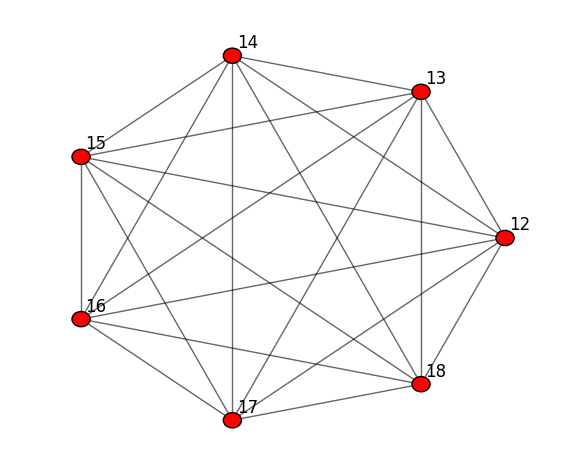

In [14]:
net_threepc_byz2 = NetworkGenerator.generate_complete_network(n=7)
net_threepc_byz2.behavioral_properties = NetworkBehaviorModel.UnlikelyRandomLossCommunication

sim_threepc_byz2 = Simulation(network=net_threepc_byz2)
threepc_byz_algorithm2 = (ThreePCByzantineAlgorithm, {'m': 2, 'coordinatorID': 0, 'n': 7},)
sim_threepc_byz2.algorithms = (threepc_byz_algorithm2, )

net_threepc_byz2.show()

In [15]:
sim_threepc_byz2.reset()
sim_threepc_byz2.run()

print("\n" + "="*70)
for node in net_threepc_byz2.nodes():
    print(f"Node {node.memory['unique_value']}: status={node.status}")

2025-12-09 18:21:15.230 | INFO     | threepc_byzantine:initializer:68 - Node 14 initialized as COORDINATOR (Byzantine tolerant, m=2, quorum=6)
2025-12-09 18:21:15.231 | INFO     | threepc_byzantine:initializer:63 - Node 18 initialized as FAULTY
2025-12-09 18:21:15.231 | INFO     | threepc_byzantine:initializer:63 - Node 17 initialized as FAULTY
2025-12-09 18:21:15.231 | INFO     | threepc_byzantine:initializer:71 - Node 12 initialized as REPLICA
2025-12-09 18:21:15.232 | INFO     | threepc_byzantine:initializer:71 - Node 16 initialized as REPLICA
2025-12-09 18:21:15.232 | INFO     | threepc_byzantine:initializer:71 - Node 13 initialized as REPLICA
2025-12-09 18:21:15.232 | INFO     | threepc_byzantine:initializer:71 - Node 15 initialized as REPLICA
2025-12-09 18:21:15.233 | INFO     | threepc_byzantine:spontaneously:88 - COORDINATOR 14 sends SIGNED PREPARE (sig=6674c4a5e6951509) to all replicas
2025-12-09 18:21:15.234 | INFO     | threepc_byzantine:receiving:301 - Replica 12 received V

In [21]:
# Visualize the pBFT execution
from IPython.display import HTML
from pydistsim.gui import drawing as draw

anim_threepc_byz2 = draw.create_animation(sim_threepc_byz2)
video_threepc_byz2 = anim_threepc_byz2.to_html5_video()
HTML(video_threepc_byz2)

2025-12-09 18:25:16.492 | INFO     | threepc_byzantine:initializer:68 - Node 12 initialized as COORDINATOR (Byzantine tolerant, m=2, quorum=6)
2025-12-09 18:25:16.492 | INFO     | threepc_byzantine:initializer:63 - Node 16 initialized as FAULTY
2025-12-09 18:25:16.492 | INFO     | threepc_byzantine:initializer:63 - Node 13 initialized as FAULTY
2025-12-09 18:25:16.492 | INFO     | threepc_byzantine:initializer:71 - Node 14 initialized as REPLICA
2025-12-09 18:25:16.493 | INFO     | threepc_byzantine:initializer:71 - Node 17 initialized as REPLICA
2025-12-09 18:25:16.493 | INFO     | threepc_byzantine:initializer:71 - Node 18 initialized as REPLICA
2025-12-09 18:25:16.493 | INFO     | threepc_byzantine:initializer:71 - Node 15 initialized as REPLICA
2025-12-09 18:25:16.492 | INFO     | threepc_byzantine:initializer:63 - Node 16 initialized as FAULTY
2025-12-09 18:25:16.492 | INFO     | threepc_byzantine:initializer:63 - Node 13 initialized as FAULTY
2025-12-09 18:25:16.492 | INFO     | 

2025-12-09 18:25:42.659 | INFO     | threepc_byzantine:initializer:68 - Node 15 initialized as COORDINATOR (Byzantine tolerant, m=2, quorum=6)
2025-12-09 18:25:42.659 | INFO     | threepc_byzantine:initializer:63 - Node 16 initialized as FAULTY
2025-12-09 18:25:42.660 | INFO     | threepc_byzantine:initializer:63 - Node 17 initialized as FAULTY
2025-12-09 18:25:42.660 | INFO     | threepc_byzantine:initializer:71 - Node 18 initialized as REPLICA
2025-12-09 18:25:42.660 | INFO     | threepc_byzantine:initializer:71 - Node 14 initialized as REPLICA
2025-12-09 18:25:42.660 | INFO     | threepc_byzantine:initializer:71 - Node 12 initialized as REPLICA
2025-12-09 18:25:42.661 | INFO     | threepc_byzantine:initializer:71 - Node 13 initialized as REPLICA
2025-12-09 18:25:42.659 | INFO     | threepc_byzantine:initializer:63 - Node 16 initialized as FAULTY
2025-12-09 18:25:42.660 | INFO     | threepc_byzantine:initializer:63 - Node 17 initialized as FAULTY
2025-12-09 18:25:42.660 | INFO     | 